# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/flynnlives/Documents/GitHub/UCI_DABC_Python_API_Challenge/WeatherPy/output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bayganin
Processing Record 2 of Set 1 | belmonte
Processing Record 3 of Set 1 | magadan
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | chui
Processing Record 7 of Set 1 | missoula
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | dzhambeyty
Processing Record 10 of Set 1 | kodinsk
Processing Record 11 of Set 1 | kanata
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | cicero dantas
Processing Record 16 of Set 1 | safaga
Processing Record 17 of Set 1 | greymouth
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | dunay
Processing Record 21 of Set 1 | afaahiti
Processing Record 22 of Set 1 | waitangi
Processin

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

city_data_df.to_csv(output_data_file, index_label="City_ID")


# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bayganin,48.6947,55.8742,87.35,26,56,9.62,KZ,1691252539
1,belmonte,-15.8631,-38.8828,78.55,51,0,6.53,BR,1691252582
2,magadan,59.5667,150.8000,53.22,62,100,7.56,RU,1691252582
3,port elizabeth,-33.9180,25.5701,72.10,82,0,0.00,ZA,1691252582
4,edinburgh of the seven seas,-37.0676,-12.3116,55.81,79,8,31.36,SH,1691252582


In [27]:
# Read saved data
city_data_df = pd.read_csv("/Users/flynnlives/Documents/GitHub/UCI_DABC_Python_API_Challenge/WeatherPy/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bayganin,48.6947,55.8742,87.35,26,56,9.62,KZ,1691252539
1,belmonte,-15.8631,-38.8828,78.55,51,0,6.53,BR,1691252582
2,magadan,59.5667,150.8000,53.22,62,100,7.56,RU,1691252582
3,port elizabeth,-33.9180,25.5701,72.10,82,0,0.00,ZA,1691252582
4,edinburgh of the seven seas,-37.0676,-12.3116,55.81,79,8,31.36,SH,1691252582


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

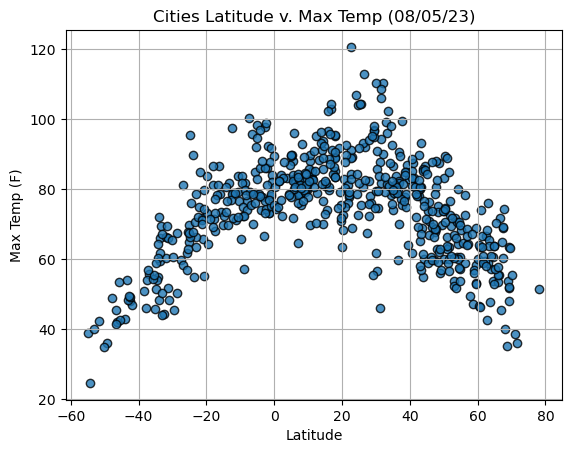

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, edgecolor='black',
            linewidth=1, marker='o',alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('Cities Latitude v. Max Temp (%s)' % time.strftime('%x'))
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("/Users/flynnlives/Documents/GitHub/UCI_DABC_Python_API_Challenge/WeatherPy/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

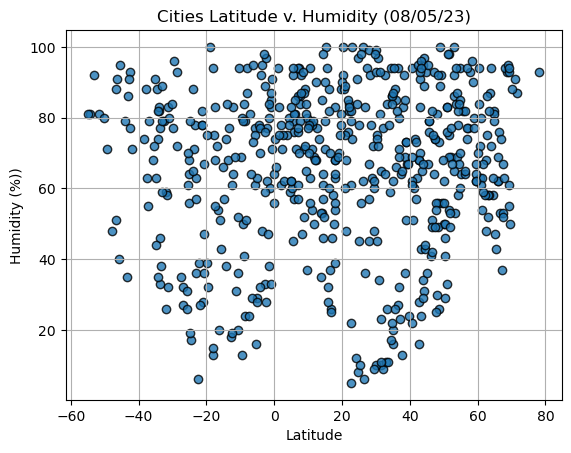

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor='black',
            linewidth=1, marker='o',alpha=0.8, label='Cities')
            
# Incorporate the other graph properties
plt.title('Cities Latitude v. Humidity (%s)' % time.strftime('%x'))
plt.ylabel('Humidity (%))')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("/Users/flynnlives/Documents/GitHub/UCI_DABC_Python_API_Challenge/WeatherPy/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

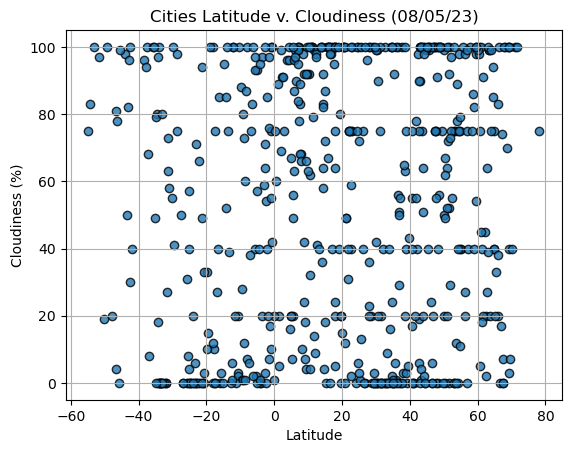

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor='black',
            linewidth=1, marker='o',alpha=0.8, label='Cities')
            
# Incorporate the other graph properties
plt.title('Cities Latitude v. Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("/Users/flynnlives/Documents/GitHub/UCI_DABC_Python_API_Challenge/WeatherPy/output_data/Fig3.png")


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

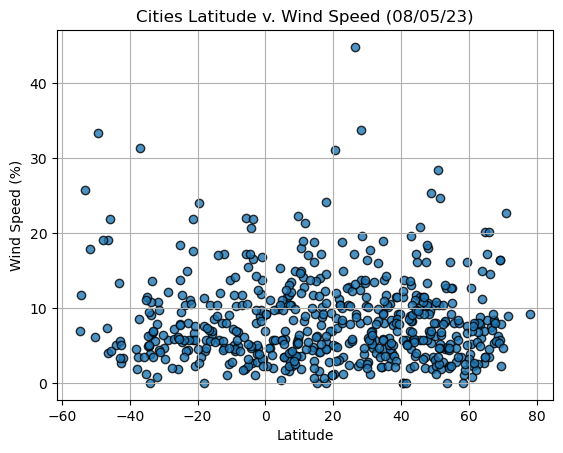

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor='black',
            linewidth=1, marker='o',alpha=0.8, label='Cities')
            
# Incorporate the other graph properties
plt.title('Cities Latitude v. Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel('Wind Speed (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("/Users/flynnlives/Documents/GitHub/UCI_DABC_Python_API_Challenge/WeatherPy/output_data/Fig4.png")


# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
def plot_lin_regress(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + ' x + ' + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel('Title')
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bayganin,48.6947,55.8742,87.35,26,56,9.62,KZ,1691252539
2,magadan,59.5667,150.8000,53.22,62,100,7.56,RU,1691252582
6,missoula,47.0166,-113.8009,59.85,64,100,1.99,US,1691252400
8,dzhambeyty,50.2536,52.5950,89.47,29,67,8.05,KZ,1691252583
9,kodinsk,58.6881,99.1844,47.25,90,86,1.12,RU,1691252583


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,belmonte,-15.8631,-38.8828,78.55,51,0,6.53,BR,1691252582
3,port elizabeth,-33.9180,25.5701,72.10,82,0,0.00,ZA,1691252582
4,edinburgh of the seven seas,-37.0676,-12.3116,55.81,79,8,31.36,SH,1691252582
5,chui,-33.6971,-53.4616,59.49,46,0,6.38,UY,1691252582
7,invercargill,-46.4000,168.3500,42.03,91,78,4.00,NZ,1691252554


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6234666339384498


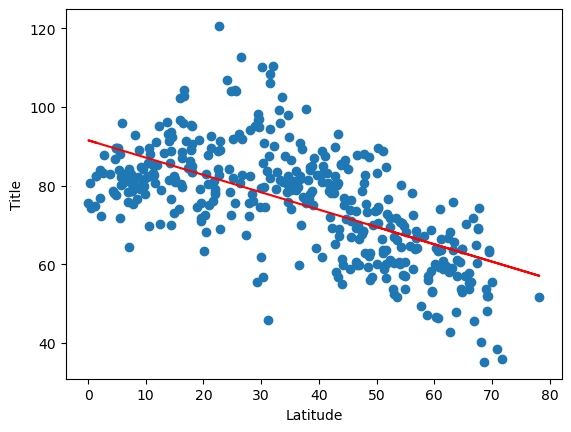

In [58]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Max Temp']
plot_lin_regress(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.8355859654251715


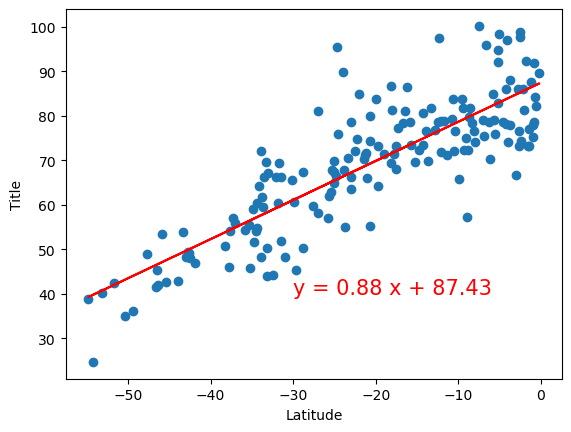

In [60]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Max Temp']
plot_lin_regress(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** Appears to be an inverse relationship in temps between north v. south.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.0056248873904324185


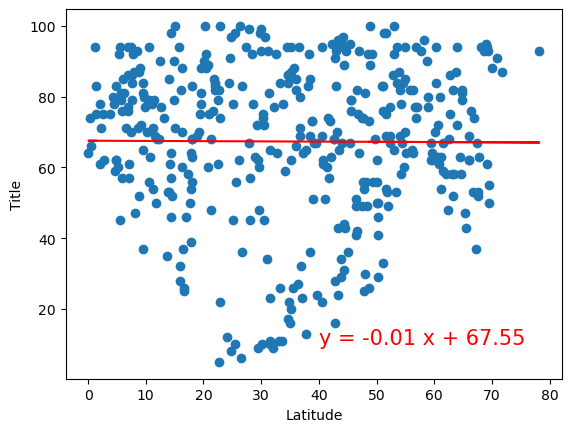

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Humidity']
plot_lin_regress(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.1291890159457151


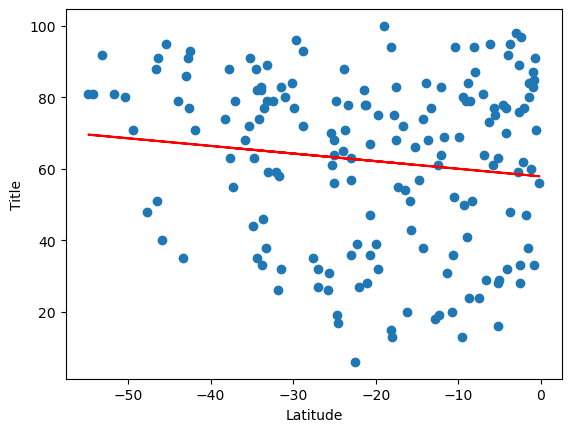

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Humidity']
plot_lin_regress(x_values,y_values, 'Humidity', (-30, 150))

**Discussion about the linear relationship:** There seems to be little change of humidity north v. south in terms of temp.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.06560954472064712


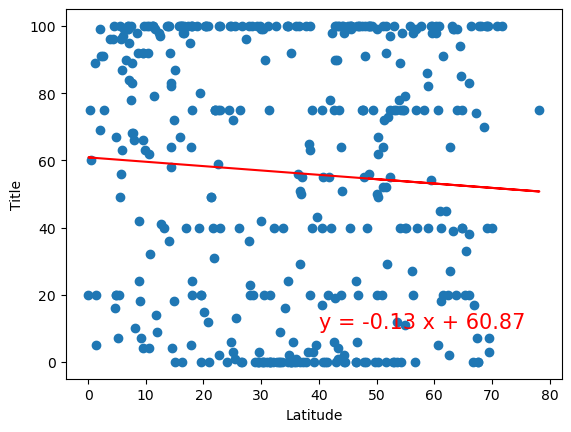

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Cloudiness']
plot_lin_regress(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: -0.08001156352625288


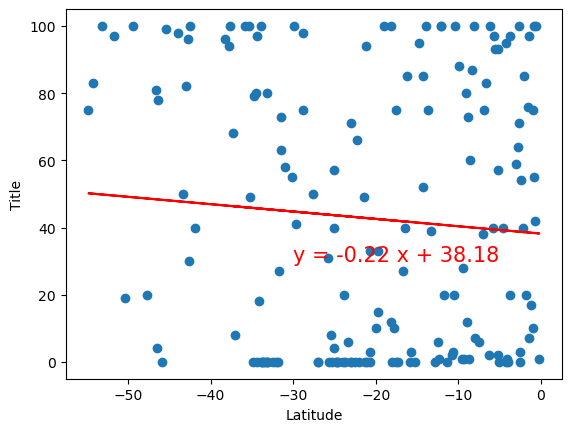

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Cloudiness']
plot_lin_regress(x_values,y_values, 'Cloudiness', (-30, 30))

**Discussion about the linear relationship:** Appears to be same relationship regardless of north v. south

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.03354930226753167


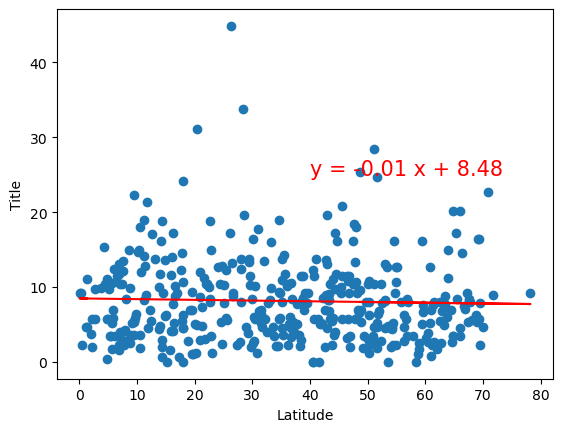

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Wind Speed']
plot_lin_regress(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.08434612181337683


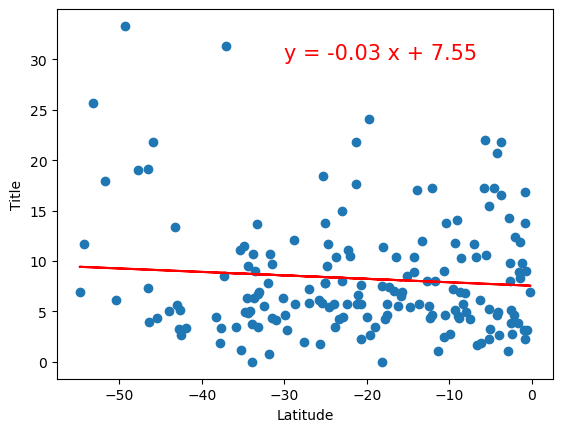

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Wind Speed']
plot_lin_regress(x_values,y_values, 'Wind Speed', (-30, 30))

**Discussion about the linear relationship:** Appears to be more wind in north v. south.